In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import statsmodels

In [2]:
df = pd.read_csv("Classified Data.csv",index_col=0)

In [3]:
df.sample(10)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
529,0.769682,1.833757,0.879089,0.800362,1.291342,1.178610,0.900248,1.241119,1.041027,1.103801,0
49,1.105788,0.683750,0.194366,0.749715,1.008333,1.266939,1.046832,0.994515,1.320822,1.025099,1
710,0.713505,1.224649,0.965845,0.493471,1.220913,1.402456,1.176871,1.069442,0.764778,1.554533,0
568,0.683455,1.507639,1.200405,0.693928,1.234890,0.861930,0.572052,1.344605,0.975378,1.362665,0
596,1.493933,1.342452,0.459651,1.017646,0.993385,0.782104,1.041178,0.780321,1.399199,1.299385,1
149,1.219074,1.036357,0.899504,0.479474,1.230633,1.206882,0.787993,0.812823,0.776557,1.666136,0
792,0.679018,0.782722,0.771131,1.091657,1.557583,0.726317,0.735006,1.315258,0.991404,1.483213,0
763,0.961384,0.969727,1.099681,0.681344,1.525328,1.194066,0.614542,1.390525,1.251913,1.456000,1
991,1.102612,1.007163,0.535051,0.633220,0.736791,0.864663,1.080128,1.230731,1.180497,1.677409,1
536,1.390822,1.082474,0.765115,0.395989,0.818182,0.734518,0.910852,1.137971,1.300944,1.446505,1


In [4]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [9]:
#Standerdization 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop(labels=['TARGET CLASS'],axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop(labels=['TARGET CLASS'],axis=1))

In [12]:
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_features

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [13]:
X = scaled_features
y = df['TARGET CLASS']

In [14]:
#train test Spliting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [15]:
#KNN application
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

In [17]:
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], d

In [18]:
#Prediction and Evaluation
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))

[[125  15]
 [ 16 144]]


In [20]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [21]:
#Choosing a K value
error_rate = []
#will take some time

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

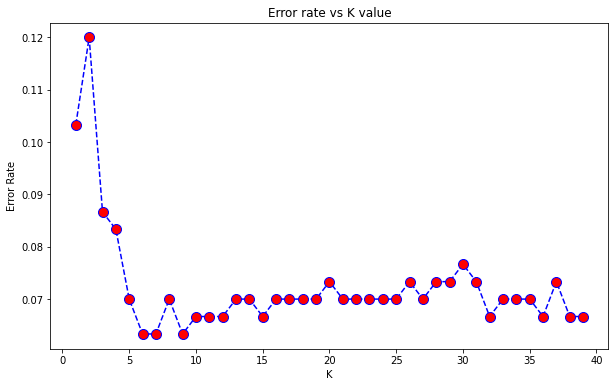

In [24]:
#Plotting Error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [25]:
#First a quick comparison to our original k=1

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('With k=1\n\n')
print(confusion_matrix(y_test,pred))
print('\n\n')
print(classification_report(y_test,pred))

With k=1


[[125  15]
 [ 16 144]]



              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

